In [12]:
import itertools
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
# For reproducibility
test_seed = 42
random.seed(test_seed)
np.random.seed(test_seed)

# Generate 10 random city coordinates within a 100x100 grid
NUM_CITIES = 10
cities = {f"C{i}": (random.uniform(0, 100), random.uniform(0, 100)) for i in range(NUM_CITIES)}

# Distance function
def distance(p, q):
    return math.hypot(p[0] - q[0], p[1] - q[1])

# Precompute distance matrix
distances = {u: {v: distance(cities[u], cities[v]) for v in cities} for u in cities}

def tour_length(path):
    return sum(distances[path[i]][path[(i+1) % len(path)]] for i in range(len(path)))

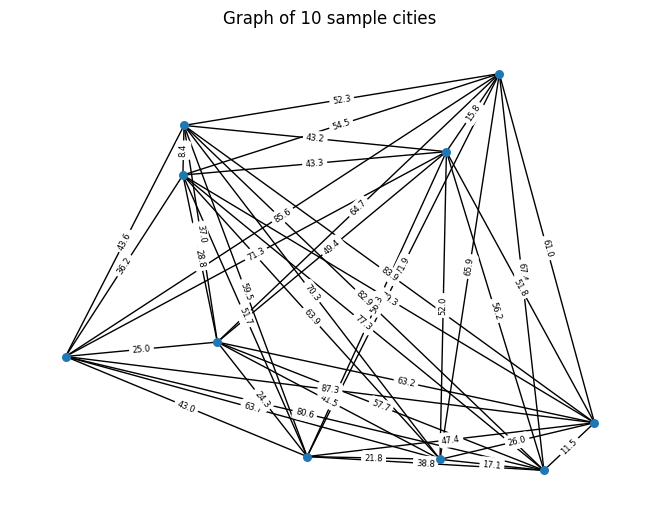

In [14]:
G = nx.Graph()
G.add_nodes_from(cities)
for u,v in itertools.combinations(cities,2):
    G.add_edge(u,v, weight=round(distances[u][v],1))
pos = {c: cities[c] for c in cities}

nx.draw(G, pos, with_labels=False, node_size=30)
edgelabels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edgelabels,font_size=6)
plt.title('Graph of 10 sample cities')
plt.axis('off'); plt.show()

In [15]:
start = time.time()
best_length = float('inf')
best_path = None
for perm in itertools.permutations(cities):
    length = sum(distances[perm[i]][perm[(i+1)%len(cities)]] for i in range(len(cities)))
    if length < best_length:
        best_length = length
        best_path = perm
brute_time = time.time() - start
print(f"Brute Force → Length: {best_length:.2f}, Time: {brute_time:.4f}s")

Brute Force → Length: 264.14, Time: 4.7231s


In [16]:
best_path

('C0', 'C4', 'C1', 'C6', 'C5', 'C8', 'C2', 'C7', 'C3', 'C9')

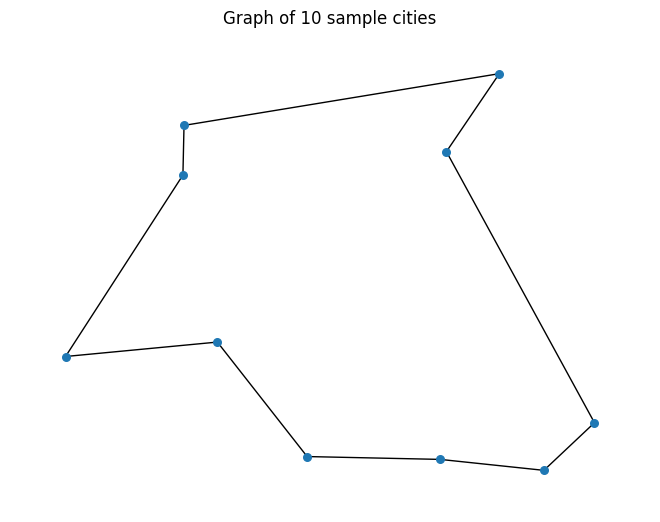

In [17]:
new_G = nx.Graph()

for a, b in zip(best_path, best_path[1:] + best_path[:1]):
    new_G.add_edge(a, b, weight=G[a][b].get('weight'))


nx.draw(new_G, pos, with_labels=False, node_size=30)
edgelabels = nx.get_edge_attributes(G,'weight')
plt.title('Graph of 10 sample cities')
plt.axis('off'); plt.show()

# Nearest Neighbor

In [ ]:

def nearest_neighbor(G : nx.Graph) -> tuple[list[str], float]:
    n = NUM_CITIES
    first = list(G.nodes)[0]

    #initialize route at the first node
    route = [first] 
    visited = {first}
    best_distance = 0
    while len(visited) < n: 
        current_node = route[-1]
        #Finds the nearest node to the current node that has not been visited yet
        nearest_node, distance = min([(i, G[current_node][i].get('weight')) for i in G[current_node] if i not in visited], key=lambda x: x[1])

        route.append(nearest_node)
        visited.add(nearest_node)
        best_distance += distance
    else:
        #Connect last node distance to the first node distance
        best_distance += G[current_node][first].get('weight')
    return (route, best_distance)

start = time.time()
nn_path, nn_length = nearest_neighbor(G)
nn_time = time.time() - start
print(f"Nearest Neighbor Time: {(nn_time * 1000):.4f}ms | Best Distance: {nn_length} Path: {nn_path}")

Nearest Neighbor Time: 0.0901ms | Best Distance: 280.90000000000003 Path: ['C0', 'C9', 'C3', 'C4', 'C1', 'C6', 'C5', 'C8', 'C7', 'C2']


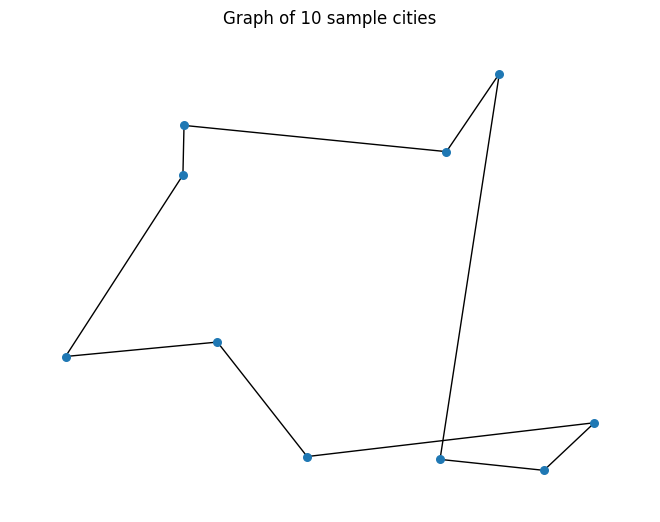

In [19]:
new_G = nx.Graph()

for a, b in zip(nn_path, nn_path[1:] + nn_path[:1]):
    new_G.add_edge(a, b, weight=G[a][b].get('weight'))

nx.draw(new_G, pos, with_labels=False, node_size=30)
edgelabels = nx.get_edge_attributes(G,'weight')
plt.title('Graph of 10 sample cities')
plt.axis('off'); plt.show()

Algorithm            |   Distance |  Time(s)
---------------------------------------------
Brute Force          |     264.14 |   4.7231
Nearest Neighbor     |     280.90 |   0.0001


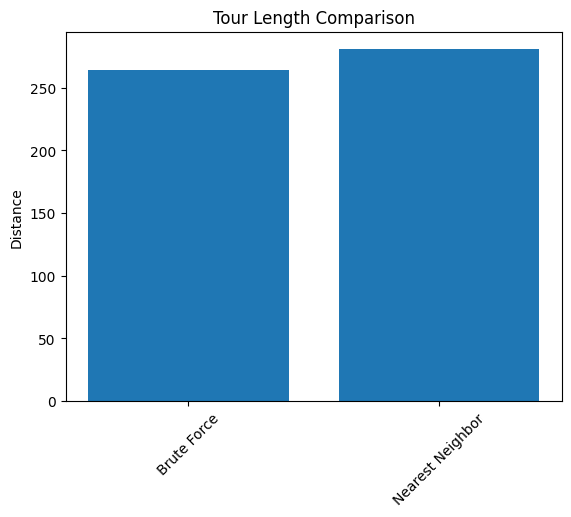

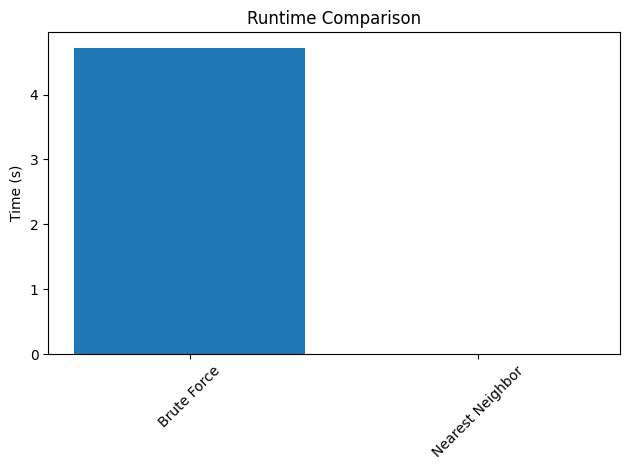

In [20]:
results = [
    ('Brute Force', best_length, brute_time),
    ('Nearest Neighbor', nn_length, nn_time),
    # ('Genetic Algorithm', ga_length, ga_time),
    # ('Simulated Annealing', best_e, sa_time),
    # ('Ant Colony', best_len, aco_time)
]

# Table
print(f"{'Algorithm':20s} | {'Distance':>10s} | {'Time(s)':>8s}")
print('-'*45)
for name, dist, t in results:
    print(f"{name:20s} | {dist:10.2f} | {t:8.4f}")

# Charts
labels = [r[0] for r in results]
distances_cmp = [r[1] for r in results]
times_cmp = [r[2] for r in results]

plt.figure()
plt.bar(labels, distances_cmp)
plt.title('Tour Length Comparison')
plt.ylabel('Distance')
plt.xticks(rotation=45)

plt.figure()
plt.bar(labels, times_cmp)
plt.title('Runtime Comparison')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()